In [1]:
import os, sys
sys.path.append(os.path.abspath('..'))

In [2]:
from callback.guest_callback_per_episode import CallbackPerEpisode
import numpy as np

In [3]:
train = CallbackPerEpisode()

In [4]:
data = train.load_data("old_obs.pkl")

Callback data loaded from old_obs.pkl


In [5]:
import os

# Create the directory if it doesn't exist
os.makedirs("./individual_episodes_test", exist_ok=True)
for i in range(720):
    train._create_episode_plot_3(i, "./individual_episodes_test")

In [ ]:
import os
from concurrent.futures import ThreadPoolExecutor

# Create the directory if it doesn't exist
os.makedirs("./individual_episodes_test", exist_ok=True)

# Define the worker function
def generate_plot(i):
    train._create_episode_plot_3(i, "./individual_episodes_test")

# Number of threads (adjust depending on your CPU and IO performance)
num_threads = 16

# Run the tasks concurrently using a thread pool
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    executor.map(generate_plot, range(720))


In [6]:
print(train.episodes_step_data[1]['rewards'])

[np.float32(0.33333334), np.float32(0.33333334), np.float32(0.33333334), np.float32(0.33333334), np.float32(0.33333334), np.float32(0.33333334), np.float32(0.33333334), np.float32(0.33333334), np.float32(0.33333334), np.float32(0.35353535), np.float32(0.37254903), np.float32(0.44444445), np.float32(0.47368422), np.float32(0.46031746), np.float32(0.44927537), np.float32(0.44), np.float32(0.43209878), np.float32(0.42528737), np.float32(0.41935483), np.float32(0.41414142), np.float32(0.40952381), np.float32(0.40952381), np.float32(0.4054054), np.float32(0.4017094), np.float32(0.398374), np.float32(0.39534885), np.float32(0.39259258), np.float32(0.39007092), np.float32(0.3877551), np.float32(0.38562092), np.float32(0.38562092), np.float32(0.39805827), np.float32(0.41025642), np.float32(0.41025642), np.float32(0.42138365), np.float32(0.43209878), np.float32(0.44242424), np.float32(0.45238096), np.float32(0.4619883), np.float32(0.4619883), np.float32(0.47126436), np.float32(0.46666667), np.f

In [7]:
action = train.episodes_step_data[1]['actions']
np_action = np.array(action)

In [8]:
np_action.ndim

1

In [9]:
stop_n_wait = []
stare_at = []
encourage = []

In [10]:
def extract_action_timeline(arr: list, action_number: int) -> list:
    action = [] 
    l = len(action)
    for i in action:
        if i == action_number:
            action.append(1)
        else:
            action.append(None)
    
    return action

In [11]:
r = extract_action_timeline(action, 1)
r

[]

In [12]:
def create_plots_from_saved_data():
    # Create callback instance
    callback = CallbackPerEpisode()
    
    # Load the saved data
    callback.load_data("callback_data.pkl")
    
    # Create plots
    callback.create_final_plots("results", max_episodes=10)
    
    # Or create plots for specific episodes
    callback.create_final_plots("results", plot_episodes=[0, 4, 9, 19])    

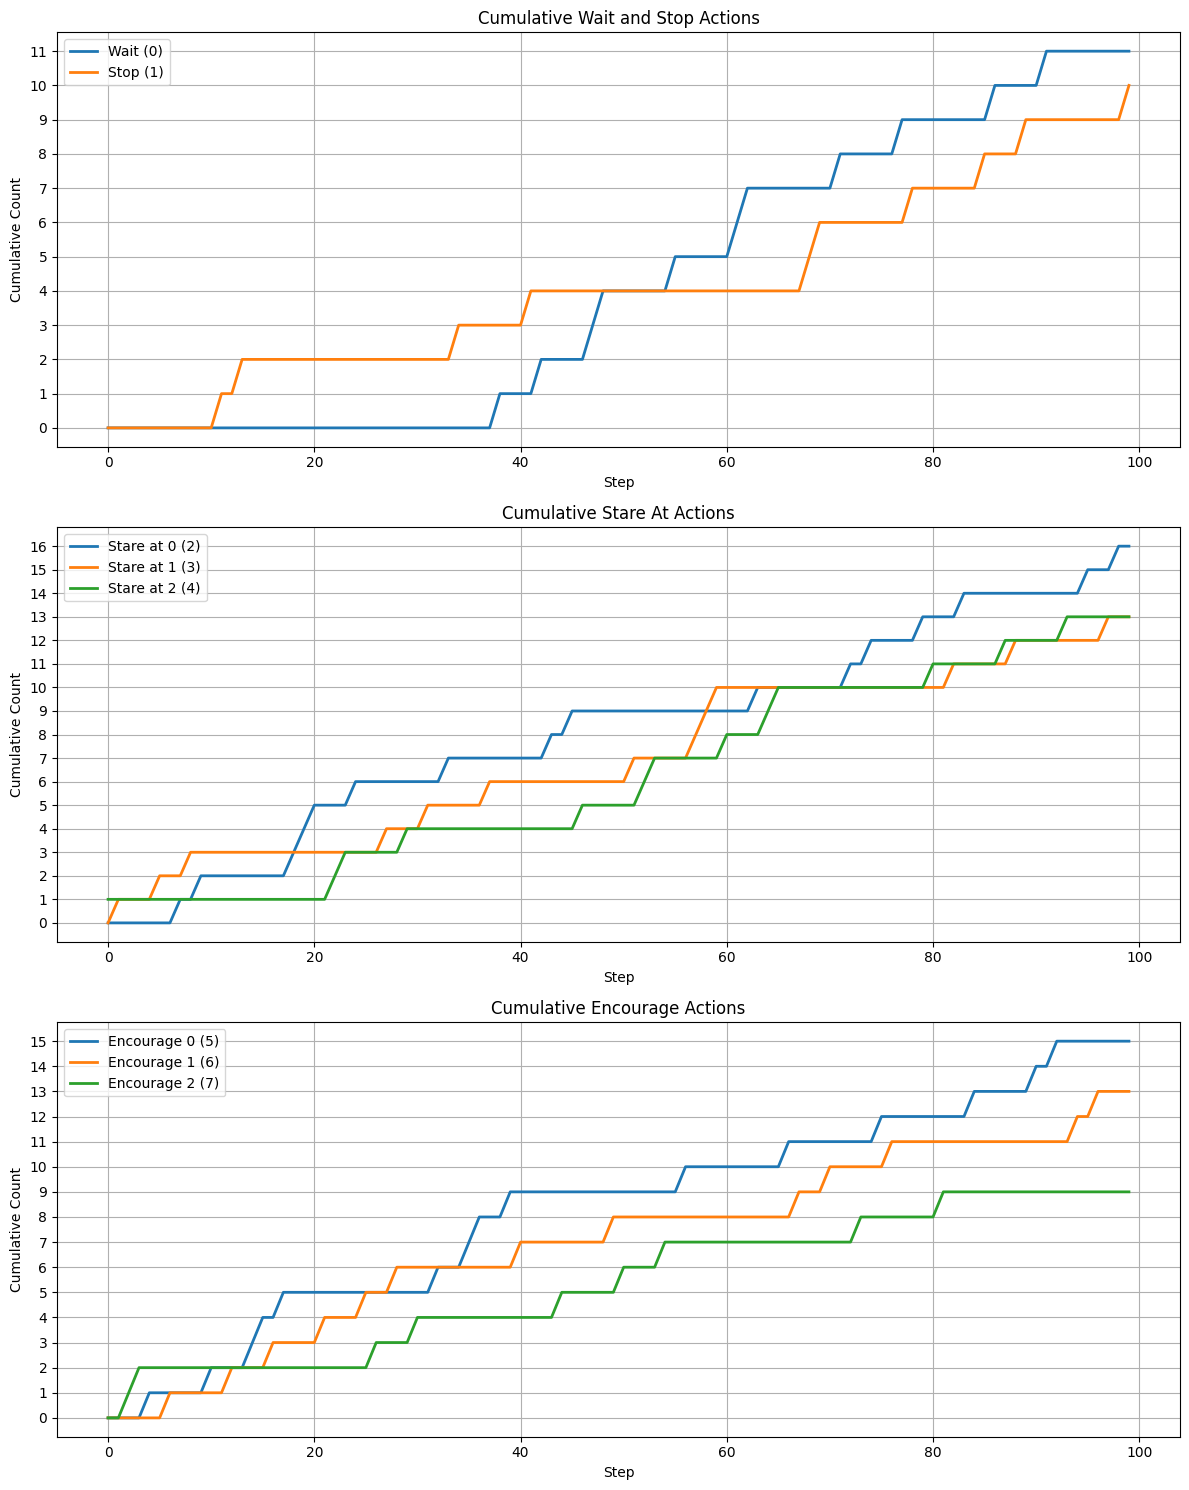

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Convert actions to their respective categories
actions = train.episodes_step_data[1]['actions']

# Create arrays to track cumulative counts for each action
# Graph 1 - wait and stop (actions 0, 1)
wait_counts = np.cumsum(np.array(actions) == 0)
stop_counts = np.cumsum(np.array(actions) == 1)

# Graph 2 - stare_at actions (actions 2, 3, 4)
stare_0_counts = np.cumsum(np.array(actions) == 2)
stare_1_counts = np.cumsum(np.array(actions) == 3)
stare_2_counts = np.cumsum(np.array(actions) == 4)

# Graph 3 - encourage actions (actions 5, 6, 7)
encourage_0_counts = np.cumsum(np.array(actions) == 5)
encourage_1_counts = np.cumsum(np.array(actions) == 6)
encourage_2_counts = np.cumsum(np.array(actions) == 7)

# Create the figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
steps = np.arange(len(actions))

# Plot Graph 1 - wait/stop actions
ax1.plot(steps, wait_counts, label='Wait (0)', linewidth=2)
ax1.plot(steps, stop_counts, label='Stop (1)', linewidth=2)
ax1.set_title('Cumulative Wait and Stop Actions')
ax1.set_xlabel('Step')
ax1.set_ylabel('Cumulative Count')
ax1.legend()
ax1.grid(True)

# Set y-ticks to show all values for Graph 1
max_val_g1 = max(wait_counts[-1], stop_counts[-1])
ax1.set_yticks(range(int(max_val_g1) + 1))

# Plot Graph 2 - stare_at actions
ax2.plot(steps, stare_0_counts, label='Stare at 0 (2)', linewidth=2)
ax2.plot(steps, stare_1_counts, label='Stare at 1 (3)', linewidth=2)
ax2.plot(steps, stare_2_counts, label='Stare at 2 (4)', linewidth=2)
ax2.set_title('Cumulative Stare At Actions')
ax2.set_xlabel('Step')
ax2.set_ylabel('Cumulative Count')
ax2.legend()
ax2.grid(True)

# Set y-ticks to show all values for Graph 2
max_val_g2 = max(stare_0_counts[-1], stare_1_counts[-1], stare_2_counts[-1])
ax2.set_yticks(range(int(max_val_g2) + 1))

# Plot Graph 3 - encourage actions
ax3.plot(steps, encourage_0_counts, label='Encourage 0 (5)', linewidth=2)
ax3.plot(steps, encourage_1_counts, label='Encourage 1 (6)', linewidth=2)
ax3.plot(steps, encourage_2_counts, label='Encourage 2 (7)', linewidth=2)
ax3.set_title('Cumulative Encourage Actions')
ax3.set_xlabel('Step')
ax3.set_ylabel('Cumulative Count')
ax3.legend()
ax3.grid(True)

# Set y-ticks to show all values for Graph 3
max_val_g3 = max(encourage_0_counts[-1], encourage_1_counts[-1], encourage_2_counts[-1])
ax3.set_yticks(range(int(max_val_g3) + 1))

plt.tight_layout()
plt.show()

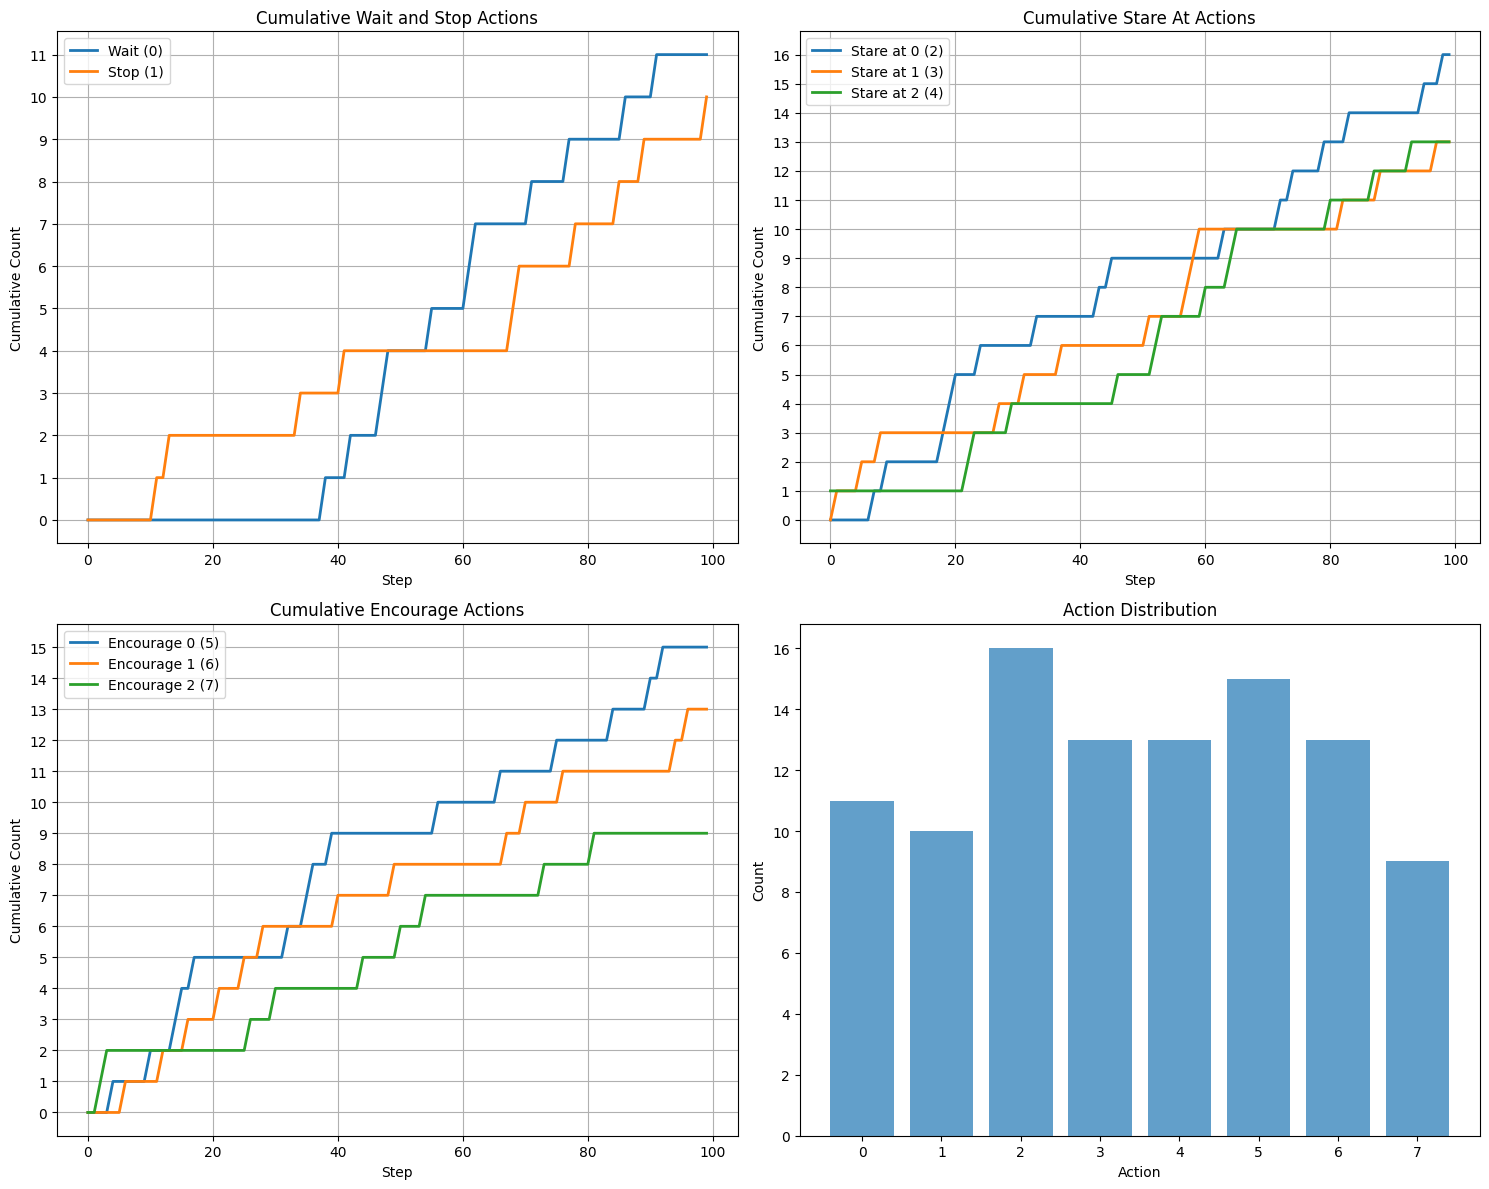

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Convert actions to their respective categories
actions = train.episodes_step_data[1]['actions']

# Create arrays to track cumulative counts for each action
# Graph 1 - wait and stop (actions 0, 1)
wait_counts = np.cumsum(np.array(actions) == 0)
stop_counts = np.cumsum(np.array(actions) == 1)

# Graph 2 - stare_at actions (actions 2, 3, 4)
stare_0_counts = np.cumsum(np.array(actions) == 2)
stare_1_counts = np.cumsum(np.array(actions) == 3)
stare_2_counts = np.cumsum(np.array(actions) == 4)

# Graph 3 - encourage actions (actions 5, 6, 7)
encourage_0_counts = np.cumsum(np.array(actions) == 5)
encourage_1_counts = np.cumsum(np.array(actions) == 6)
encourage_2_counts = np.cumsum(np.array(actions) == 7)

# Create a figure with a grid of subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
steps = np.arange(len(actions))

# Add the three action type graphs to the subplot grid
# You can adjust the positions as needed

# Graph 1 - wait/stop actions at position [0, 0]
axes[0, 0].plot(steps, wait_counts, label='Wait (0)', linewidth=2)
axes[0, 0].plot(steps, stop_counts, label='Stop (1)', linewidth=2)
axes[0, 0].set_title('Cumulative Wait and Stop Actions')
axes[0, 0].set_xlabel('Step')
axes[0, 0].set_ylabel('Cumulative Count')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Set y-ticks to show all values for Graph 1
max_val_g1 = max(wait_counts[-1], stop_counts[-1])
if max_val_g1 < 20:  # Only show all ticks if not too many
    axes[0, 0].set_yticks(range(int(max_val_g1) + 1))

# Graph 2 - stare_at actions at position [0, 1]
axes[0, 1].plot(steps, stare_0_counts, label='Stare at 0 (2)', linewidth=2)
axes[0, 1].plot(steps, stare_1_counts, label='Stare at 1 (3)', linewidth=2)
axes[0, 1].plot(steps, stare_2_counts, label='Stare at 2 (4)', linewidth=2)
axes[0, 1].set_title('Cumulative Stare At Actions')
axes[0, 1].set_xlabel('Step')
axes[0, 1].set_ylabel('Cumulative Count')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Set y-ticks to show all values for Graph 2
max_val_g2 = max(stare_0_counts[-1], stare_1_counts[-1], stare_2_counts[-1])
if max_val_g2 < 20:  # Only show all ticks if not too many
    axes[0, 1].set_yticks(range(int(max_val_g2) + 1))

# Graph 3 - encourage actions at position [1, 0]
axes[1, 0].plot(steps, encourage_0_counts, label='Encourage 0 (5)', linewidth=2)
axes[1, 0].plot(steps, encourage_1_counts, label='Encourage 1 (6)', linewidth=2)
axes[1, 0].plot(steps, encourage_2_counts, label='Encourage 2 (7)', linewidth=2)
axes[1, 0].set_title('Cumulative Encourage Actions')
axes[1, 0].set_xlabel('Step')
axes[1, 0].set_ylabel('Cumulative Count')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Set y-ticks to show all values for Graph 3
max_val_g3 = max(encourage_0_counts[-1], encourage_1_counts[-1], encourage_2_counts[-1])
if max_val_g3 < 20:  # Only show all ticks if not too many
    axes[1, 0].set_yticks(range(int(max_val_g3) + 1))

# Your existing code for the action distribution bar chart at position [1, 1]
# Count occurrences of each action
unique_actions = sorted(np.unique(actions))
action_counts = [list(actions).count(action) for action in unique_actions]

if len(unique_actions) > 0:
    axes[1, 1].bar(unique_actions, action_counts, alpha=0.7)
    axes[1, 1].set_xlabel('Action')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('Action Distribution')
    axes[1, 1].set_xticks(unique_actions)
else:
    axes[1, 1].text(0.5, 0.5, 'No valid actions recorded', 
                   transform=axes[1, 1].transAxes, ha='center', va='center')
    axes[1, 1].set_title('Action Distribution')

plt.tight_layout()
plt.show()

In [15]:
import os

# Create the directory if it doesn't exist
os.makedirs("./individual_episodes_test", exist_ok=True)
for i in range(10):
    train._create_episode_plot_3(i, "./individual_episodes_test")